In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import analysis_utils as aua

In [2]:
sample_2048 = pd.read_csv('C:/Users/charl/Desktop/Uni_Leipzig/MA/Code/PlatformIO/IMU_Audit/MA_files/Recherche/Ergebnisse/PID_tests/drift_log_fft.txt', delim_whitespace=True, header = 0)
sample_2048 = sample_2048.apply(pd.to_numeric, errors="coerce")  # Wandelt alle Spalten in Float um
sample_2048

C:\Users\charl\AppData\Local\Temp\ipykernel_7188\3041969682.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  sample_2048 = pd.read_csv('C:/Users/charl/Desktop/Uni_Leipzig/MA/Code/PlatformIO/IMU_Audit/MA_files/Recherche/Ergebnisse/PID_tests/drift_log_fft.txt', delim_whitespace=True, header = 0)


,ax,ay,az,gx,gy,gz
0,-0.144815,-0.422477,9.818113,0.014966,-0.023824,-0.028711
1,-0.123272,-0.378195,9.791783,0.022297,-0.054978,-0.016799
2,-0.254324,0.053857,9.939590,0.058643,-0.046731,-0.029627
3,-0.353660,-0.157382,9.958141,0.019242,-0.040317,0.000611
4,-0.038298,-0.399139,10.032942,0.022297,-0.037874,-0.002749
...,...,...,...,...,...,...
2043,-0.174736,-0.090958,9.950361,0.025351,-0.039095,-0.034819
2044,-0.180720,-0.093352,9.954551,0.044288,-0.034819,-0.003054
2045,-0.193885,-0.090958,9.968314,0.038485,-0.036346,-0.011301
2046,-0.184310,-0.112501,9.967715,0.034514,-0.025962,-0.016188


In [3]:
# Sampling-Rate
fs = 1024  # Hz
N = len(sample_2048)  # Anzahl der Samples (2048)

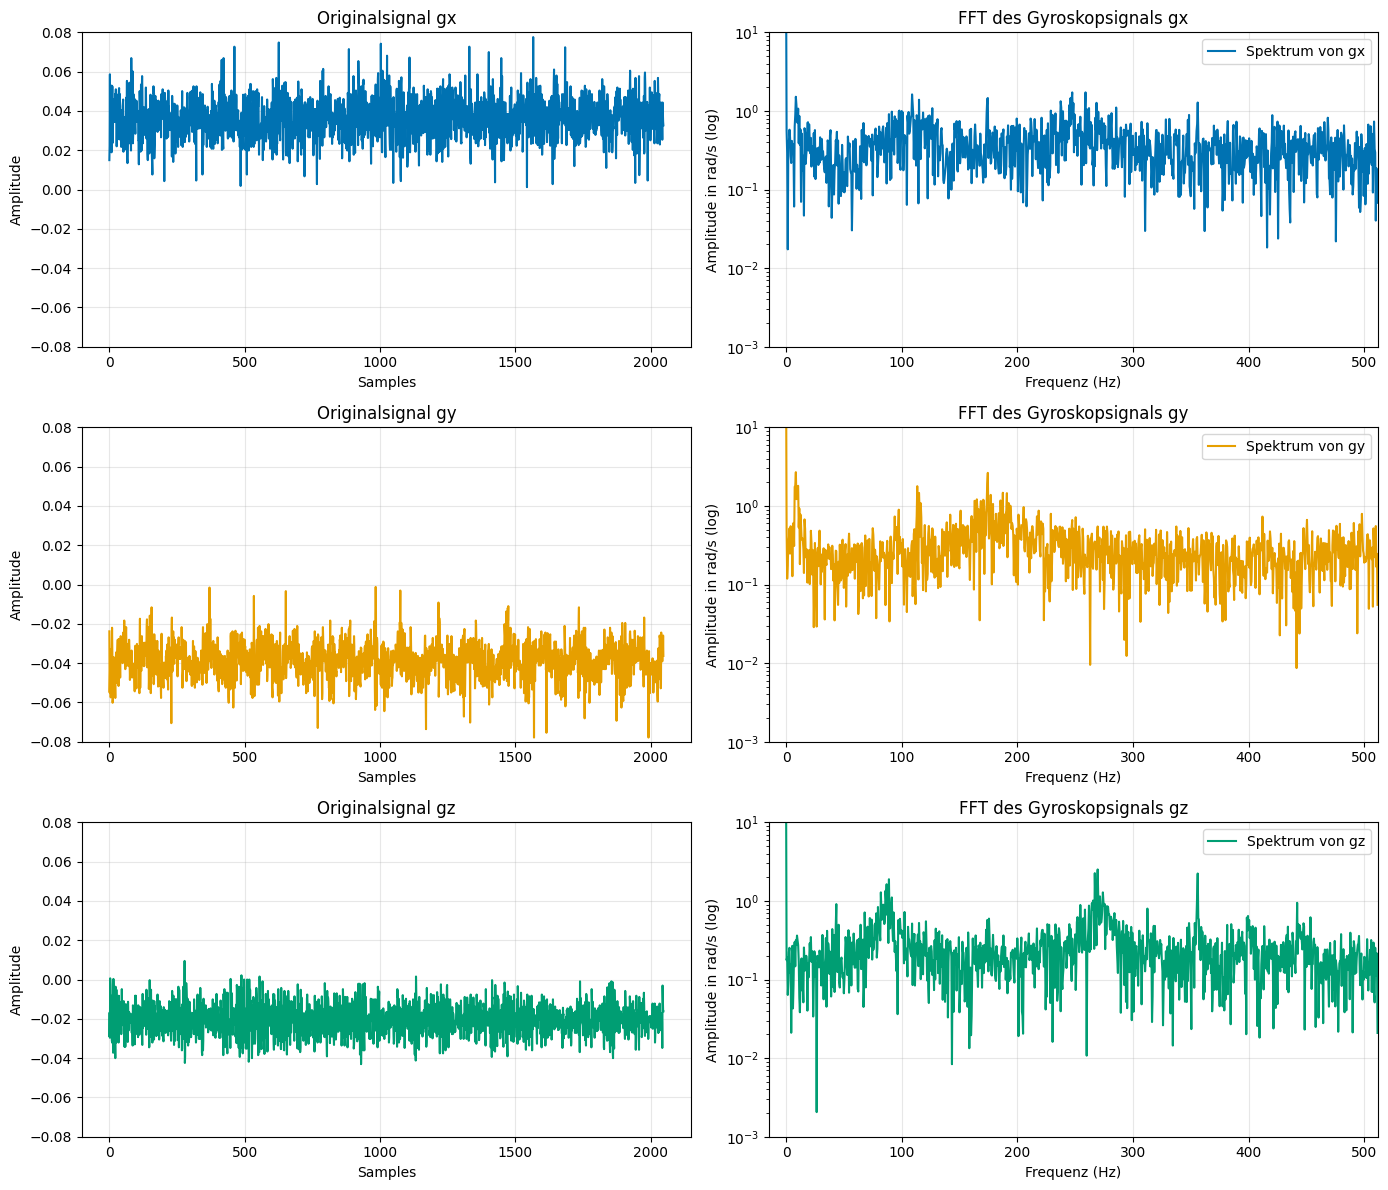

In [8]:
fig, axes = plt.subplots(3, 2, figsize=(14, 12))  # 3 Reihen, 2 Spalten
colors = ["#0072B2", "#E69F00", "#009E73"]
gyro_axes = ["gx", "gy", "gz"]

for i, axis in enumerate(gyro_axes):
    # Originalsignal (links)
    axes[i, 0].plot(sample_2048[axis], color=colors[i])
    axes[i, 0].set_xlabel("Samples")
    axes[i, 0].set_ylabel("Amplitude")
    axes[i, 0].set_title(f"Originalsignal {axis}")
    axes[i, 0].grid(alpha=0.3)
    axes[i, 0].set_ylim(-0.08, 0.08)

    # FFT (rechts)
    fft_values = np.fft.fft(sample_2048[axis])
    freqs = np.fft.fftfreq(N, d=1/fs)

    half_N = N // 2
    fft_magnitude = np.abs(fft_values[:half_N])
    freqs = freqs[:half_N]

    axes[i, 1].plot(freqs, fft_magnitude, label=f"Spektrum von {axis}", color=colors[i])
    axes[i, 1].set_xlabel("Frequenz (Hz)")
    # stimmt das rad/s?
    axes[i, 1].set_ylabel("Amplitude in rad/s (log)")
    axes[i, 1].set_title(f"FFT des Gyroskopsignals {axis}")
    axes[i, 1].legend()
    axes[i, 1].grid(alpha=0.3)
    axes[i, 1].set_xlim(-15, fs/2)
    axes[i, 1].set_ylim(1e-3, 10)
    axes[i, 1].set_yscale("log")

plt.tight_layout()
plt.show()


In [5]:
# # FFT Plots für alle Gyroskop-Achsen

# gyro_axes = ["gx", "gy", "gz"]

# fig, axes = plt.subplots(3, 1, figsize=(10, 12))
# colors = ["#0072B2", "#E69F00", "#009E73"]

# for i, axis in enumerate(gyro_axes):
#     fft_values = np.fft.fft(sample_2048[axis])
#     freqs = np.fft.fftfreq(N, d=1/fs)

#     half_N = N // 2
#     fft_magnitude = np.abs(fft_values[:half_N])
#     freqs = freqs[:half_N]

#     axes[i].plot(freqs, fft_magnitude, label=f"Spektrum von {axis}", color=colors[i])
#     axes[i].set_xlabel("Frequenz (Hz)")
#     axes[i].set_ylabel("Amplitude (log)")
#     axes[i].set_title(f"FFT des Gyroskopsignals {axis}")
#     axes[i].legend()
#     axes[i].grid(alpha=0.3)
#     axes[i].set_xlim(0, fs/2)
#     axes[i].set_ylim(1e-3, 10)
#     axes[i].set_yscale("log")

# plt.tight_layout()

In [6]:
# # FFT Plots für alle Beschleunigungs-Achsen

# accel_axes = ["ax", "ay", "az"]

# fig, axes = plt.subplots(3, 1, figsize=(10, 12))
# colors = ["#D55E00", "#CC79A7", "#56B4E9"]  # Neue Farben für Accel

# for i, axis in enumerate(accel_axes):
#     fft_values = np.fft.fft(sample_2048[axis])
#     freqs = np.fft.fftfreq(N, d=1/fs)

#     half_N = N // 2
#     fft_magnitude = np.abs(fft_values[:half_N])
#     freqs = freqs[:half_N]

#     axes[i].plot(freqs, fft_magnitude, label=f"Spektrum von {axis}", color=colors[i])
#     axes[i].set_xlabel("Frequenz (Hz)")
#     axes[i].set_ylabel("Amplitude (log)")
#     axes[i].set_title(f"FFT des Beschleunigungssignals {axis}")
#     axes[i].legend()
#     axes[i].grid(alpha=0.3)
#     axes[i].set_xlim(0, fs/2)
#     axes[i].set_ylim(1e-3, 10)
#     axes[i].set_yscale("log")

# plt.tight_layout()
# plt.show()


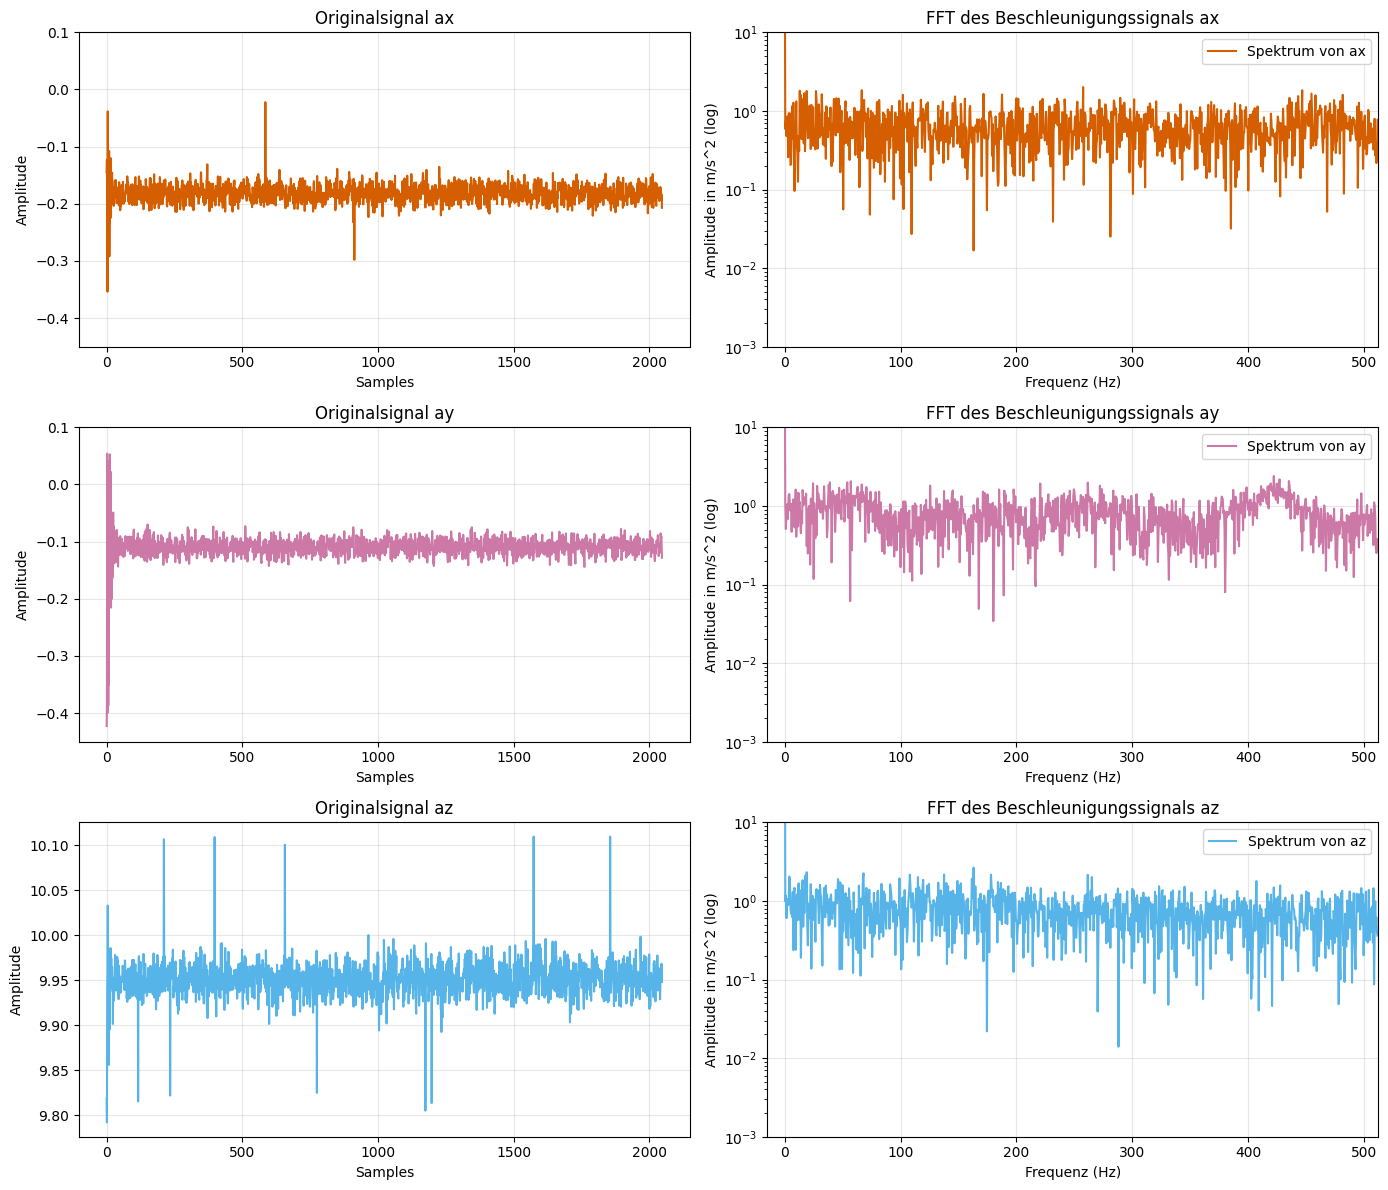

In [9]:
fig, axes = plt.subplots(3, 2, figsize=(14, 12))  # 3 Reihen, 2 Spalten
colors = ["#D55E00", "#CC79A7", "#56B4E9"]
accel_axes = ["ax", "ay", "az"]

for i, axis in enumerate(accel_axes):
    # Originalsignal (links)
    axes[i, 0].plot(sample_2048[axis], color=colors[i])
    axes[i, 0].set_xlabel("Samples")
    axes[i, 0].set_ylabel("Amplitude")
    axes[i, 0].set_title(f"Originalsignal {axis}")
    axes[i, 0].grid(alpha=0.3)

    if axis in ["ax", "ay"]:
        axes[i, 0].set_ylim(-0.45, 0.1)

    # FFT (rechts)
    fft_values = np.fft.fft(sample_2048[axis])
    freqs = np.fft.fftfreq(N, d=1/fs)

    half_N = N // 2
    fft_magnitude = np.abs(fft_values[:half_N])
    freqs = freqs[:half_N]

    axes[i, 1].plot(freqs, fft_magnitude, label=f"Spektrum von {axis}", color=colors[i])
    axes[i, 1].set_xlabel("Frequenz (Hz)")
    axes[i, 1].set_ylabel("Amplitude in m/s^2 (log)")
    axes[i, 1].set_title(f"FFT des Beschleunigungssignals {axis}")
    axes[i, 1].legend()
    axes[i, 1].grid(alpha=0.3)
    axes[i, 1].set_xlim(-15, fs/2)
    axes[i, 1].set_ylim(1e-3, 10)
    axes[i, 1].set_yscale("log")

plt.tight_layout()
plt.show()
